In [23]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


In [24]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [25]:
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

print("Unique classes:", unique_classes)
print("Number of unique classes:", num_classes)



Unique classes: [0 1 2 3 4 5 6 7 8 9]
Number of unique classes: 10


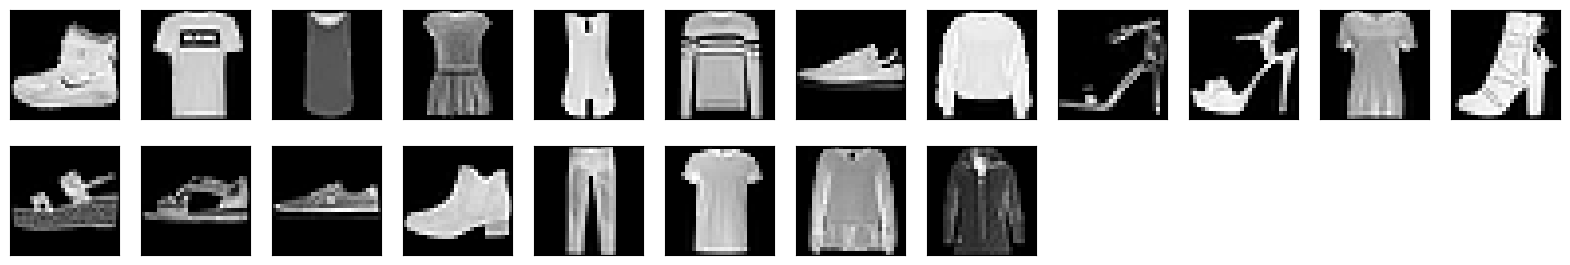

In [26]:


fig = plt.figure(figsize=(20,5))
for i in range(20):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]), cmap= 'gray')
plt.show()

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [29]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [30]:
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [31]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
checkpoint = ModelCheckpoint(filepath='mnist.best.wts.model.keras', save_best_only=True, verbose=1)

In [34]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3, shuffle = True, callbacks = [checkpoint], verbose = 2)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.36083, saving model to mnist.best.wts.model.keras
1204/1204 - 15s - 12ms/step - accuracy: 0.7931 - loss: 0.5619 - val_accuracy: 0.8685 - val_loss: 0.3608
Epoch 2/20

Epoch 2: val_loss improved from 0.36083 to 0.29170, saving model to mnist.best.wts.model.keras
1204/1204 - 13s - 11ms/step - accuracy: 0.8703 - loss: 0.3501 - val_accuracy: 0.8912 - val_loss: 0.2917
Epoch 3/20

Epoch 3: val_loss improved from 0.29170 to 0.26028, saving model to mnist.best.wts.model.keras
1204/1204 - 13s - 11ms/step - accuracy: 0.8899 - loss: 0.2979 - val_accuracy: 0.9028 - val_loss: 0.2603
Epoch 4/20

Epoch 4: val_loss did not improve from 0.26028
1204/1204 - 14s - 11ms/step - accuracy: 0.9016 - loss: 0.2670 - val_accuracy: 0.9009 - val_loss: 0.2650
Epoch 5/20

Epoch 5: val_loss improved from 0.26028 to 0.24467, saving model to mnist.best.wts.model.keras
1204/1204 - 14s - 12ms/step - accuracy: 0.9100 - loss: 0.2436 - val_accuracy: 0.9102 - val_loss: 0.24

In [35]:
model.load_weights('mnist.best.wts.model.keras')

In [36]:
y_pred = model.predict(X_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [37]:
mnist_labels = ['Tshirt', 'Trousers', 'Pullover shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

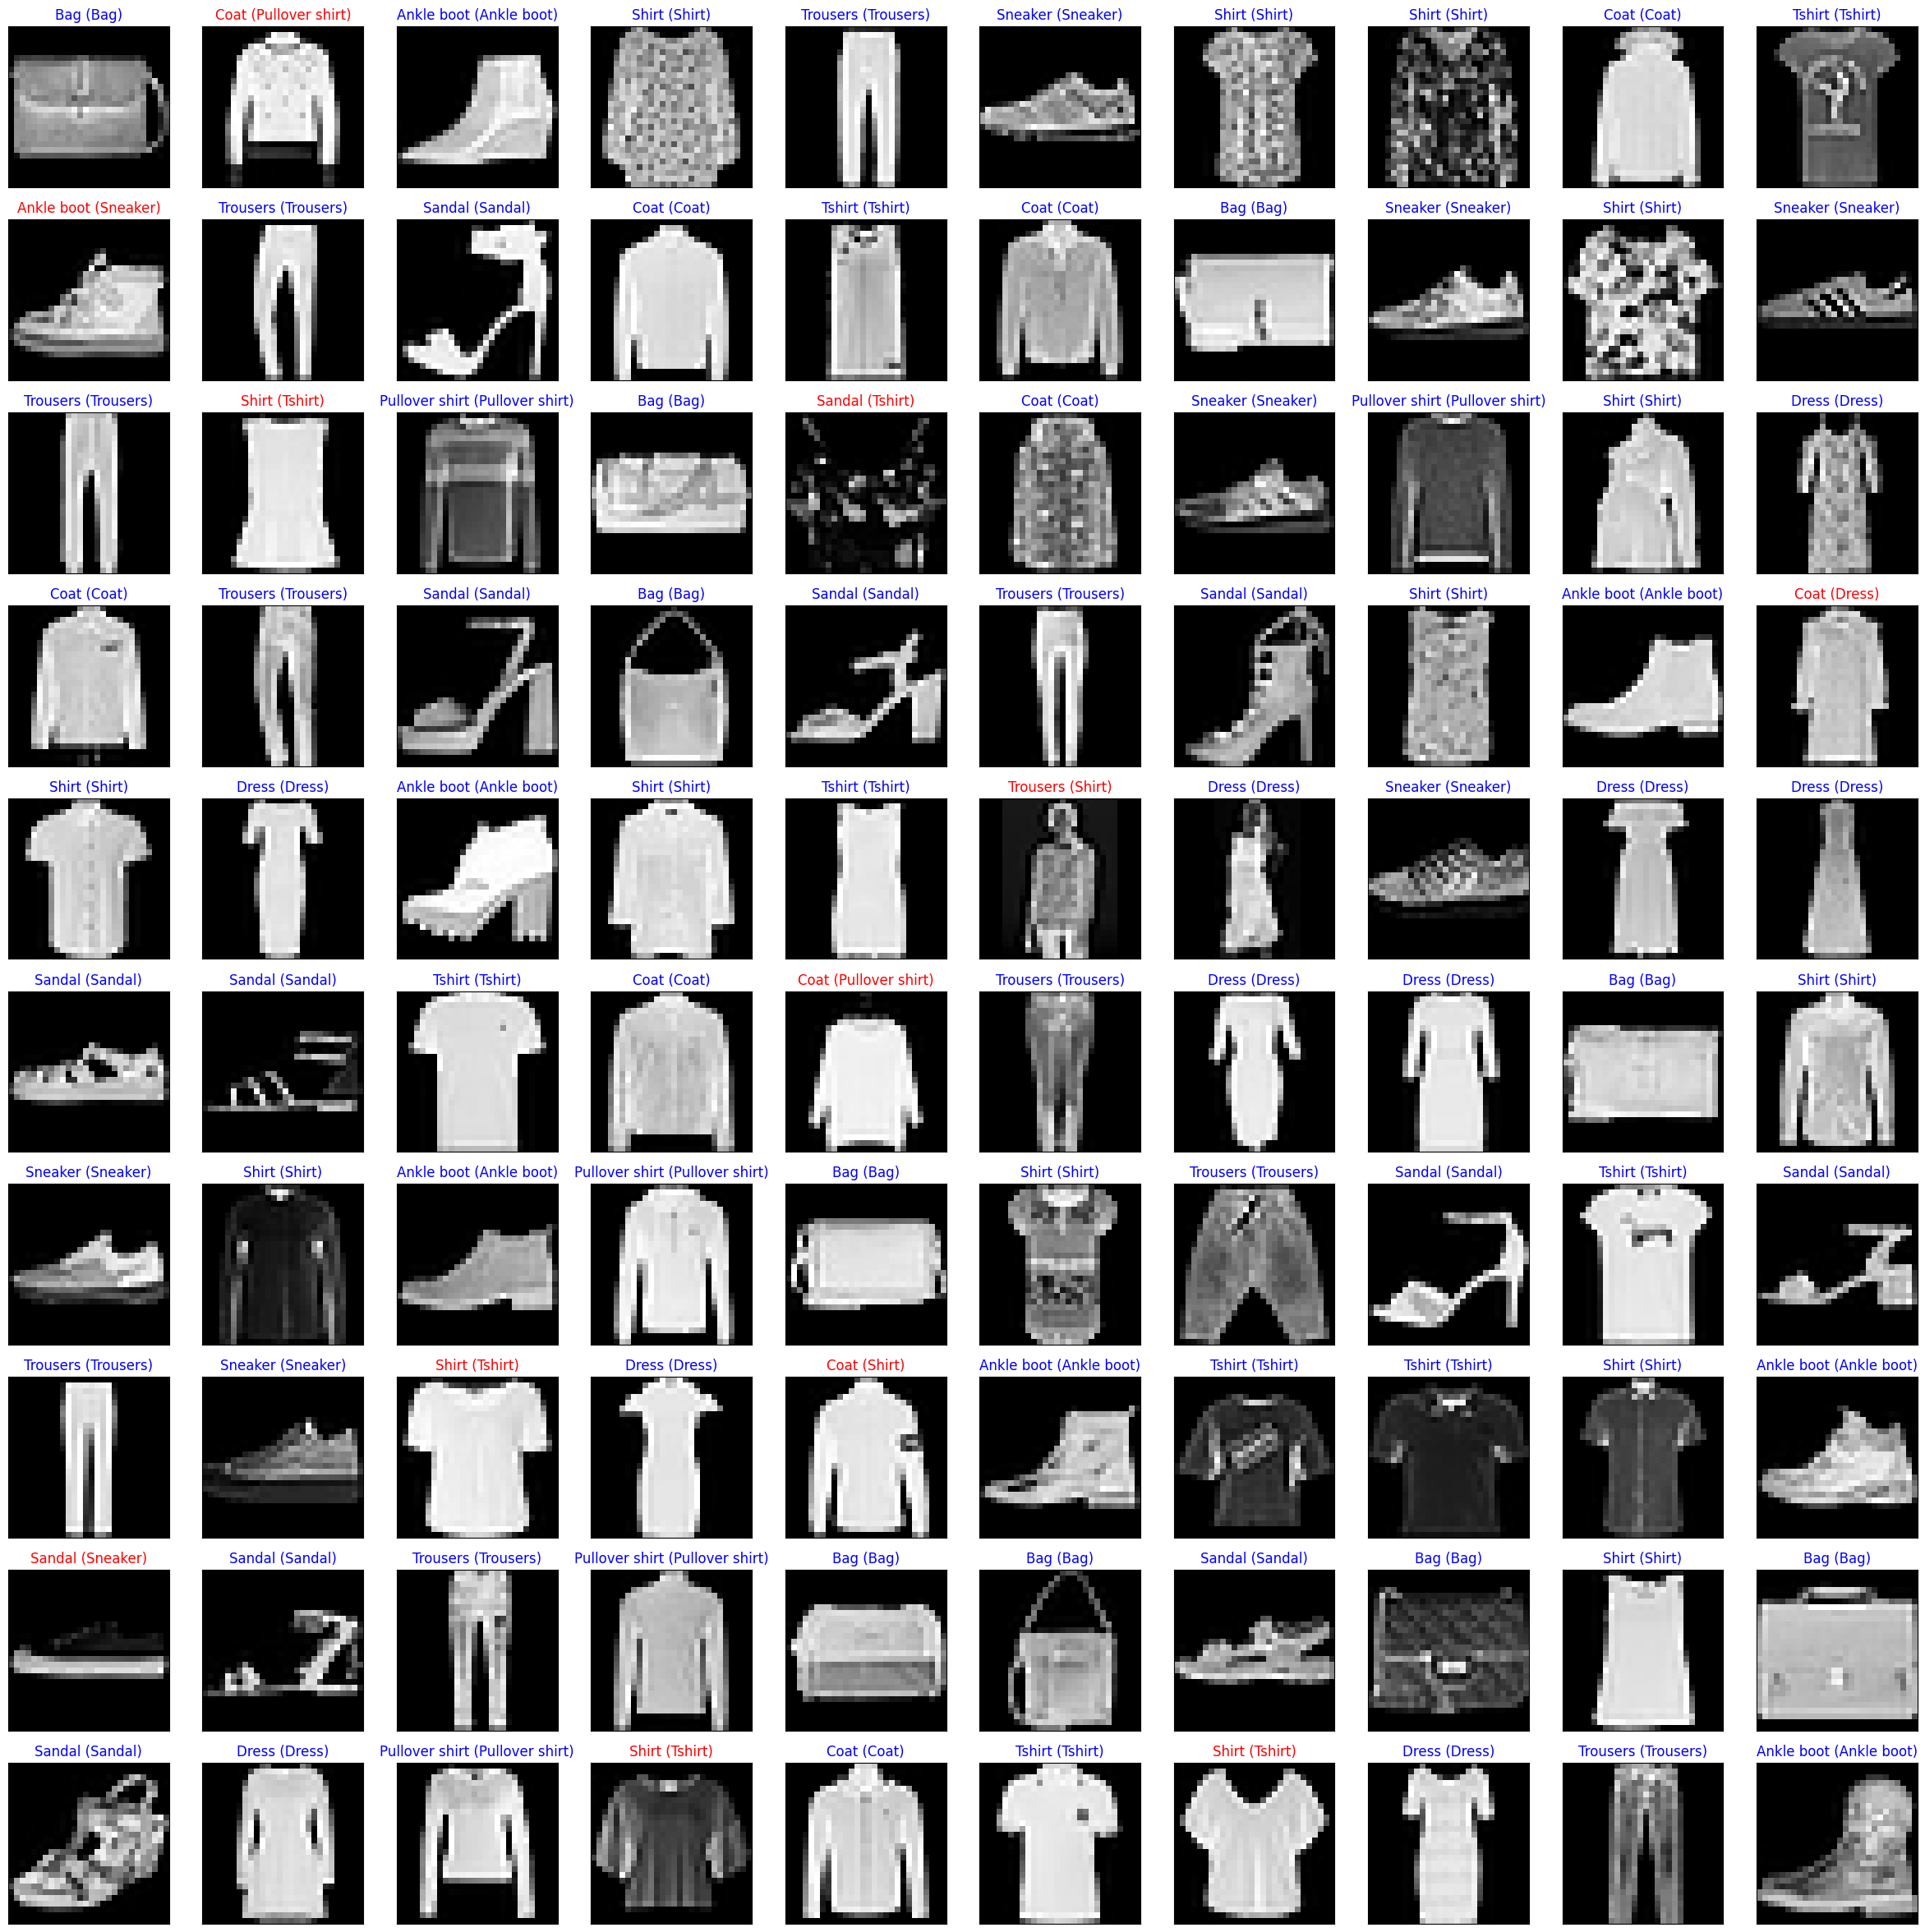

In [38]:
fig = plt.figure(figsize=(30, 30))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=100, replace=False)):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]), cmap = 'gray')
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))
plt.show()

In [39]:

score = model.evaluate(X_test, y_test, verbose=2)
accuracy = 100*score[1]
print('Test accuracy: %.2f%%' % accuracy)


313/313 - 2s - 7ms/step - accuracy: 0.9214 - loss: 0.2432
Test accuracy: 92.14%


In [42]:

pickle.dump(model,open('modelcnn.pkl','wb'))